## hogehoge
- This note is an attempt to reproduce the original paper. Documentation will be added later.
- original paper : Arkhangelsky, Dmitry, et al. Synthetic difference in differences. No. w25532. National Bureau of Economic Research, 2019. https://arxiv.org/abs/1812.09970

In [1]:
import warnings

warnings.filterwarnings("ignore")

import sys
import os

sys.path.append(os.path.abspath("../"))

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from tqdm import tqdm

from synthdid.model import SynthDID
from synthdid.sample_data import fetch_CaliforniaSmoking

In [2]:
df = fetch_CaliforniaSmoking()

PRE_TEREM = [1970, 1988]
POST_TEREM = [1989, 2000]

TREATMENT = ["California"]

df.head()

,Alabama,Arkansas,Colorado,Connecticut,Delaware,Georgia,Idaho,Illinois,Indiana,Iowa,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,West Virginia,Wisconsin,Wyoming,California
1970,89.800003,100.300003,124.800003,120.000000,155.000000,109.900002,102.400002,124.800003,134.600006,108.500000,...,92.699997,99.800003,106.400002,65.500000,122.599998,124.300003,114.500000,106.400002,132.199997,123.000000
1971,95.400002,104.099998,125.500000,117.599998,161.100006,115.699997,108.500000,125.599998,139.300003,108.400002,...,96.699997,106.300003,108.900002,67.699997,124.400002,128.399994,111.500000,105.400002,131.699997,121.000000
1972,101.099998,103.900002,134.300003,110.800003,156.300003,117.000000,126.099998,126.599998,149.199997,109.400002,...,103.000000,111.500000,108.599998,71.300003,138.000000,137.000000,117.500000,108.800003,140.000000,123.500000
1973,102.900002,108.000000,137.899994,109.300003,154.699997,119.800003,121.800003,124.400002,156.000000,110.599998,...,103.500000,109.699997,110.400002,72.699997,146.800003,143.100006,116.599998,109.500000,141.199997,124.400002
1974,108.199997,109.699997,132.800003,112.400002,151.300003,123.699997,125.599998,131.899994,159.600006,116.099998,...,108.400002,114.800003,114.699997,75.599998,151.800003,149.600006,119.900002,111.800003,145.800003,126.699997


In [3]:
melt_df = pd.melt(
    df.reset_index().rename(columns={"index": "year"}),
    id_vars="year",
    value_name="consumption",
    var_name="state",
)
melt_df["is_California"] = melt_df["state"] == "California"
melt_df

,year,state,consumption,is_California
0,1970,Alabama,89.800003,False
1,1971,Alabama,95.400002,False
2,1972,Alabama,101.099998,False
3,1973,Alabama,102.900002,False
4,1974,Alabama,108.199997,False
...,...,...,...,...
1204,1996,California,54.500000,True
1205,1997,California,53.799999,True
1206,1998,California,52.299999,True
1207,1999,California,47.200001,True


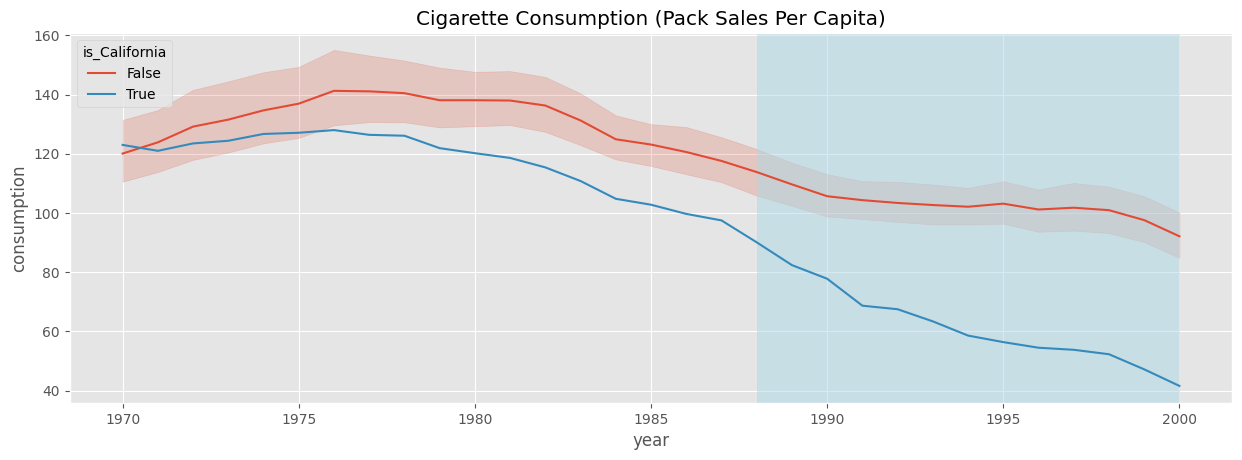

In [4]:
fig, ax = plt.subplots()
fig.set_figwidth(15)

sns.lineplot(x="year", y="consumption", hue="is_California", data=melt_df, ax=ax)

ax.axvspan(1988, 2000, alpha=0.5, color="lightblue")

plt.title("Cigarette Consumption (Pack Sales Per Capita)")
plt.show()

In [5]:
sdid = SynthDID(df, PRE_TEREM, POST_TEREM, TREATMENT)

In [6]:
sdid.fit(zeta_type="base")

In [7]:
hat_omega, hat_lambda = sdid.estimated_params()
hat_omega

,features,sdid_weight
0,Alabama,0.000
1,Arkansas,0.000
2,Colorado,0.082
3,Connecticut,0.062
4,Delaware,0.000
5,Georgia,0.000
6,Idaho,0.101
7,Illinois,0.025
8,Indiana,0.000
9,Iowa,0.024


In [8]:
hat_lambda

,time,sdid_weight
0,1970,0.000
1,1971,0.000
2,1972,0.000
3,1973,0.000
4,1974,0.000
5,1975,0.000
6,1976,0.000
7,1977,0.000
8,1978,0.000
9,1979,0.000


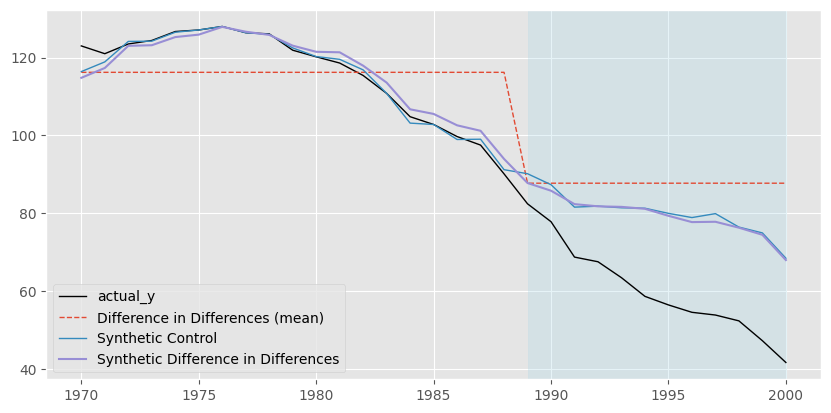

In [9]:
sdid.delta_plot()

## AA test
- see

https://davidahirshberg.bitbucket.io/static/synth-did-slides.pdf

In [10]:
PRE_TEREM2 = [1970, 1979]
POST_TEREM2 = [1980, 1988]
sdid_c = SynthDID(df, PRE_TEREM2, POST_TEREM2,  ["California"])
sdid_nh = SynthDID(df, PRE_TEREM2, POST_TEREM2, ["New Hampshire"])

In [11]:
sdid_c.fit()
sdid_nh.fit()

<img src="fig/california.png">

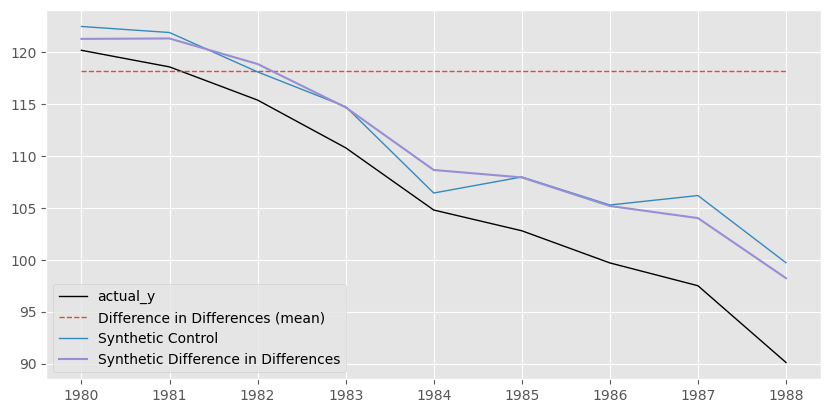

In [12]:
sdid_c.delta_plot(post_only=True)


<img src="fig/NewHampshire.png">

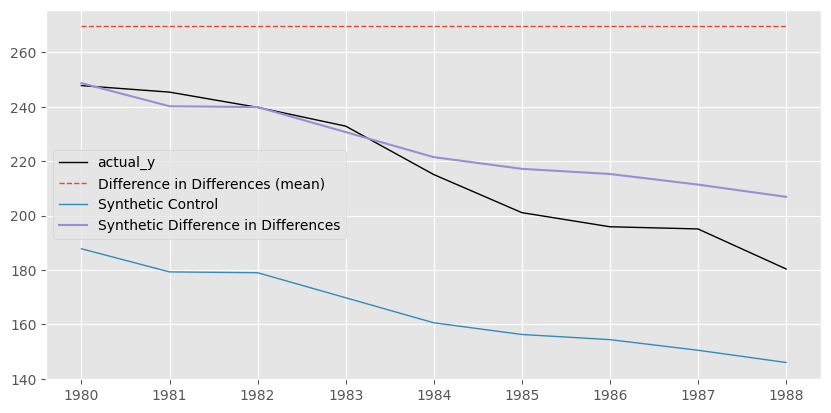

In [13]:
sdid_nh.delta_plot(post_only=True)

In [14]:
state_list = df.columns

result_mse_list = []

for _state in tqdm(state_list):
    _sdid = SynthDID(df, PRE_TEREM2, POST_TEREM2, [_state])
    _sdid.fit()

    _outcome = pd.DataFrame({"actual_y": _sdid.target_y()})

    _outcome["did"] = _sdid.did_potentical_outcome()
    _outcome["sc"] = _sdid.sc_potentical_outcome()
    _outcome["sdid"] = _sdid.sdid_potentical_outcome()
    _outcome = _outcome.loc[POST_TEREM2[0] : POST_TEREM2[1]]

    _mse = np.sqrt((_outcome.mean() - _outcome.mean()["actual_y"]) ** 2)
    _mse = pd.DataFrame(_mse).T[["did", "sc", "sdid"]]
    _mse.index = [_state]

    result_mse_list.append(_mse)

100%|██████████| 39/39 [01:52<00:00,  2.88s/it]


In [15]:
result_mse = pd.concat(result_mse_list)

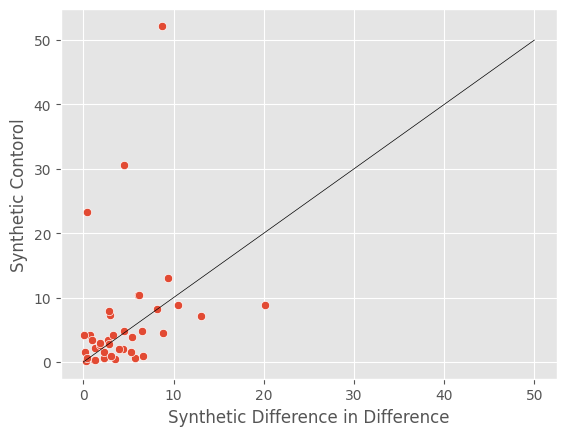

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
_x = np.linspace(0, 50, 30)
_y = _x
sns.scatterplot(data=result_mse, x="sdid", y="sc", ax = ax)
ax.plot(_x, _y, color='black',  linestyle='solid',linewidth = 0.5)
ax.set_xlabel("Synthetic Difference in Difference")
ax.set_ylabel("Synthetic Contorol")
#ax.set_xlim(0, 25)
#ax.set_ylim(0, 55)
plt.show()